In [5]:
import sys
sys.path.append('../')

import keras_tuner as kt
import pandas as pd
import tensorflow as tf
from Utils import *

## CNN-RF-LSTM Model

#### Import data (ESC-10)

In [8]:
# import the .pkl file
df = pd.read_pickle("../esc10.pkl")
print('Shape of the dataframe:', df.shape)
mel_shape = df.mel_spectrogram[0].shape
print('Shape of a mel spectrogram:', mel_shape)
df.head()

Shape of the dataframe: (1600, 4)
Shape of a mel spectrogram: (128, 155)


,mel_spectrogram,target,fold,original
0,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,True
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
2,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
4,"[[0.9999999, 0.851576, 0.36829507, 0.39175826,...",0,1,True


hidden_size : 32 \
lstm_dropout : 0.3 \
conv_1_filters : 80 \
conv_1_kernel_size : 3 \
pool_1_size : 2 \
conv_2_filters : 128 \
conv_2_kernel_size : 4 \
pool_2_size : 5 \
dense_neurons : 160 \
dense_layer_activation : tanh \
dense_dropout : 0.3

#### Define the initialization model function

In [9]:
def init_model():
    
    inputs = tf.keras.Input(shape=(mel_shape[0], mel_shape[1]))
    x = tf.keras.layers.Reshape((mel_shape[0], mel_shape[1], 1))(inputs)
    x = tf.keras.layers.Conv2D(80, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, 4, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((5, 5))(x)

    # GRU inputs: A 3D tensor, with shape (batch, timesteps, mel_filterbanks).
    lstm_layer = tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.3)

    x = tf.keras.layers.Permute((3, 1, 2))(x)
    #print("Shape after Permutation:", x.shape)

    x = tf.keras.layers.Reshape((x.shape[1]*x.shape[2],x.shape[3]))(x)
    #print("Shape after Reshape:", x.shape)

    x = tf.keras.layers.Permute((2, 1))(x)
    #print("Shape after Permutation:", x.shape)

    x = lstm_layer(x)
    #print("Shape after GRU:", x.shape)

    x = tf.keras.layers.Flatten()(x)
    #print("Shape after Flatten:", x.shape)

    x = tf.keras.layers.Dense(x.shape[1], activation='relu')(x)
    x = tf.keras.layers.Dense(160, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # compile
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model 

#### Model Summary

In [10]:
model = init_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 155)]        0         
                                                                 
 reshape (Reshape)           (None, 128, 155, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 153, 80)      800       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 76, 80)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 73, 128)       163968    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 14, 128)      0         
 2D)                                                       

#### Training and results

Fold 1/5

Pre-training accuracy: 10.000000149011612 %
Epoch 1/15
40/40 [==============================] - 41s 956ms/step - loss: 1.5378 - accuracy: 0.4305 - val_loss: 1.3128 - val_accuracy: 0.5250
Epoch 2/15
40/40 [==============================] - 35s 883ms/step - loss: 0.9054 - accuracy: 0.6805 - val_loss: 1.1160 - val_accuracy: 0.5875
Epoch 3/15
40/40 [==============================] - 33s 824ms/step - loss: 0.6526 - accuracy: 0.7680 - val_loss: 1.1641 - val_accuracy: 0.6250
Epoch 4/15
40/40 [==============================] - 33s 836ms/step - loss: 0.4451 - accuracy: 0.8445 - val_loss: 1.1225 - val_accuracy: 0.7375
Epoch 5/15
40/40 [==============================] - 33s 833ms/step - loss: 0.3568 - accuracy: 0.8727 - val_loss: 1.1356 - val_accuracy: 0.7000
Epoch 6/15
40/40 [==============================] - 33s 817ms/step - loss: 0.2616 - accuracy: 0.9062 - val_loss: 1.1563 - val_accuracy: 0.7500
Epoch 7/15
40/40 [==============================] - 34s 846ms/step - loss: 0.1644 - accu

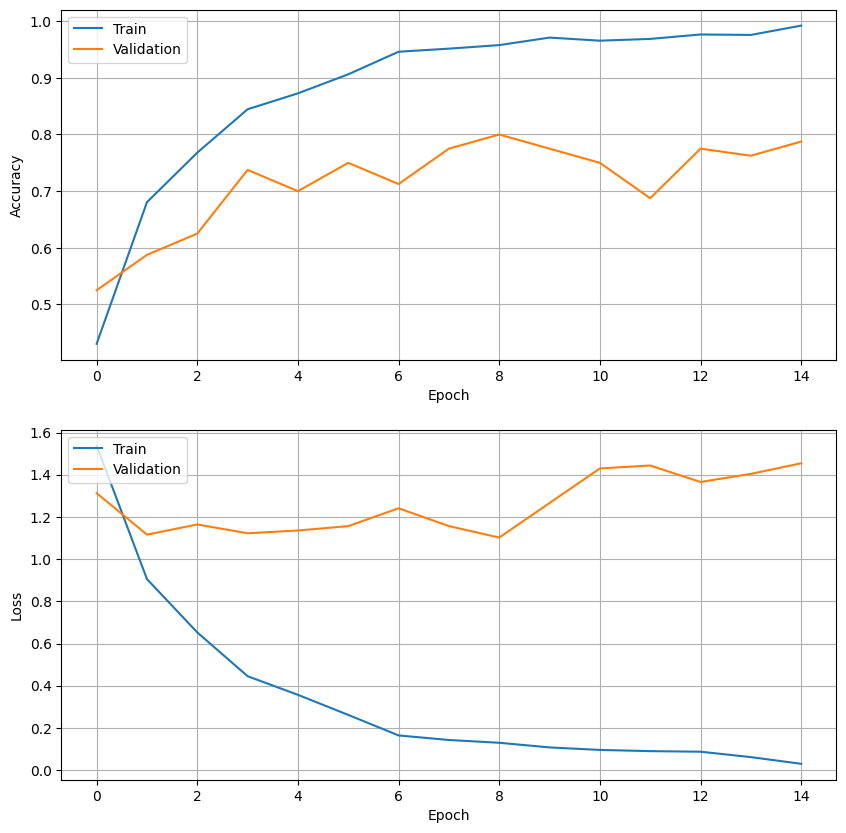

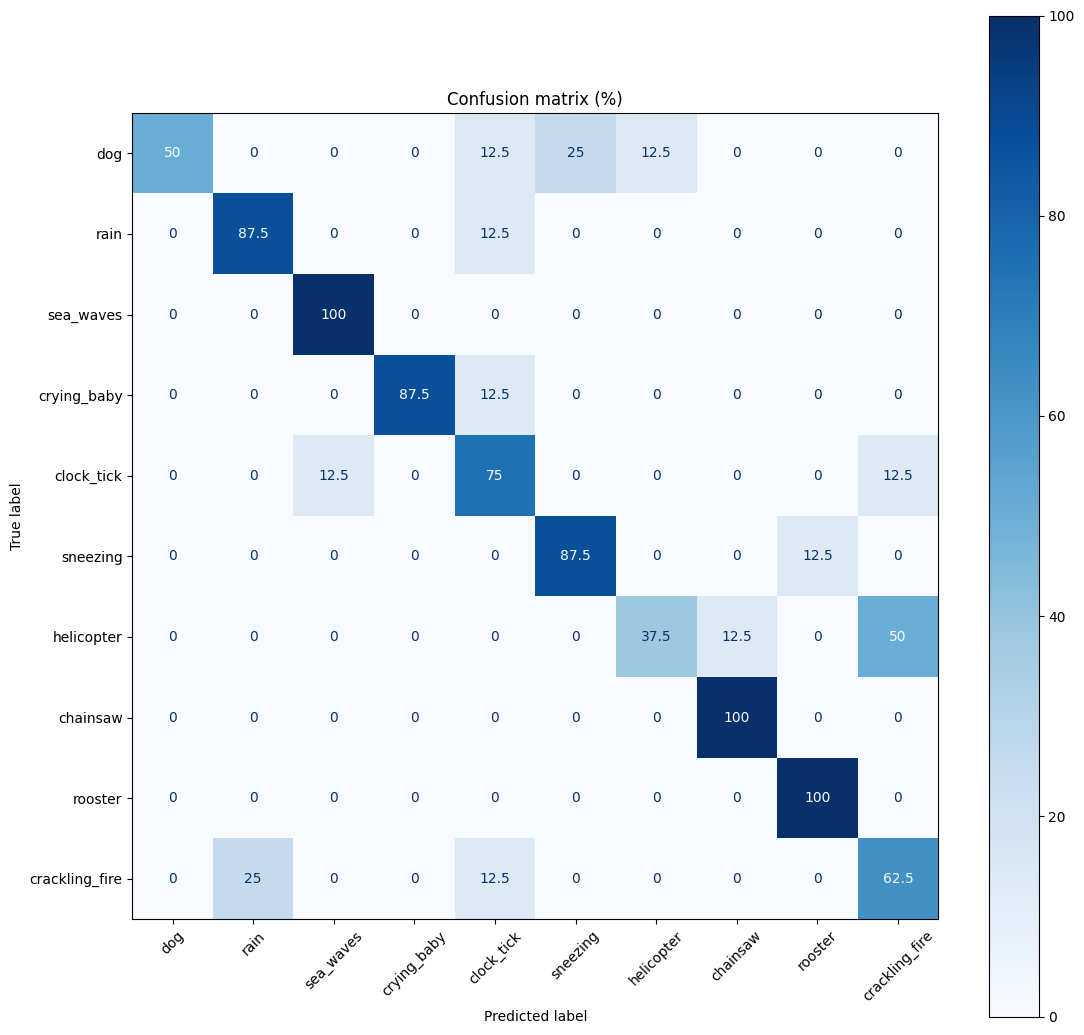

Fold 2/5

Pre-training accuracy: 10.000000149011612 %
Epoch 1/15
40/40 [==============================] - 35s 810ms/step - loss: 1.5452 - accuracy: 0.4195 - val_loss: 1.0784 - val_accuracy: 0.6000
Epoch 2/15
40/40 [==============================] - 32s 812ms/step - loss: 1.0099 - accuracy: 0.6367 - val_loss: 0.7815 - val_accuracy: 0.7125
Epoch 3/15
40/40 [==============================] - 35s 866ms/step - loss: 0.7399 - accuracy: 0.7430 - val_loss: 0.7651 - val_accuracy: 0.7750
Epoch 4/15
40/40 [==============================] - 33s 825ms/step - loss: 0.4676 - accuracy: 0.8398 - val_loss: 0.6569 - val_accuracy: 0.7625
Epoch 5/15
40/40 [==============================] - 34s 840ms/step - loss: 0.3408 - accuracy: 0.8805 - val_loss: 0.8845 - val_accuracy: 0.7125
Epoch 6/15
40/40 [==============================] - 33s 822ms/step - loss: 0.3133 - accuracy: 0.8953 - val_loss: 0.5613 - val_accuracy: 0.8250
Epoch 7/15
40/40 [==============================] - 32s 803ms/step - loss: 0.1984 - accu

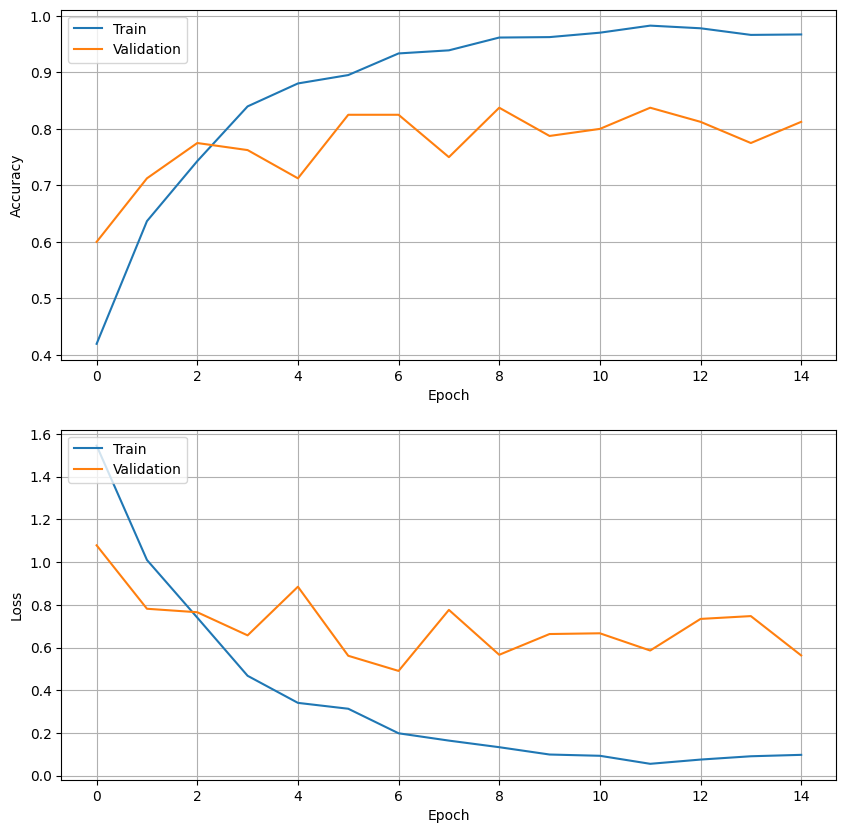

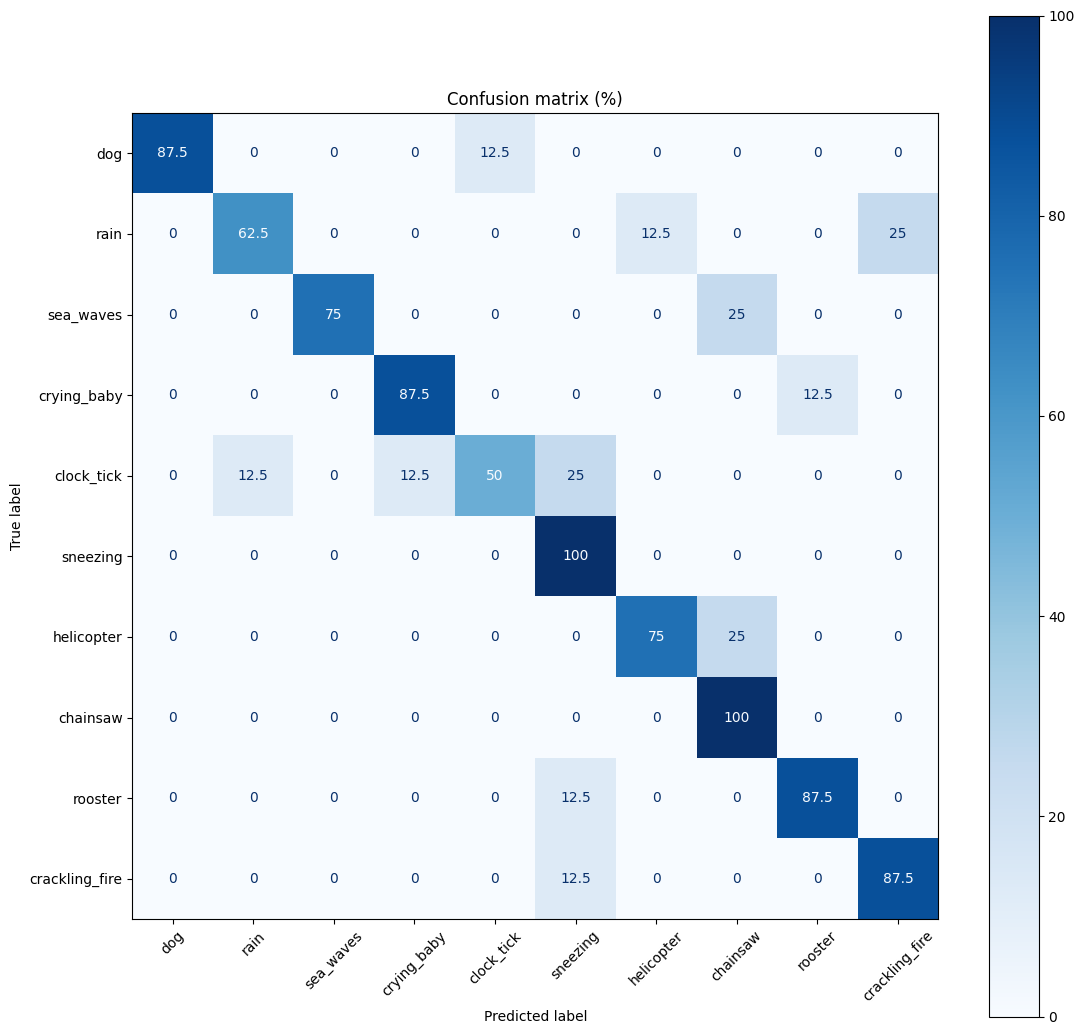

Fold 3/5

Pre-training accuracy: 3.750000149011612 %
Epoch 1/15
40/40 [==============================] - 34s 799ms/step - loss: 1.4756 - accuracy: 0.4523 - val_loss: 1.3703 - val_accuracy: 0.5875
Epoch 2/15
40/40 [==============================] - 31s 784ms/step - loss: 0.9319 - accuracy: 0.6492 - val_loss: 1.2376 - val_accuracy: 0.6000
Epoch 3/15
40/40 [==============================] - 31s 779ms/step - loss: 0.7025 - accuracy: 0.7516 - val_loss: 0.9537 - val_accuracy: 0.7125
Epoch 4/15
40/40 [==============================] - 34s 844ms/step - loss: 0.4615 - accuracy: 0.8398 - val_loss: 1.0436 - val_accuracy: 0.7125
Epoch 5/15
40/40 [==============================] - 32s 807ms/step - loss: 0.3808 - accuracy: 0.8672 - val_loss: 0.9702 - val_accuracy: 0.7125
Epoch 6/15
40/40 [==============================] - 33s 820ms/step - loss: 0.2520 - accuracy: 0.9109 - val_loss: 0.8752 - val_accuracy: 0.7625
Epoch 7/15
40/40 [==============================] - 32s 788ms/step - loss: 0.1548 - accur

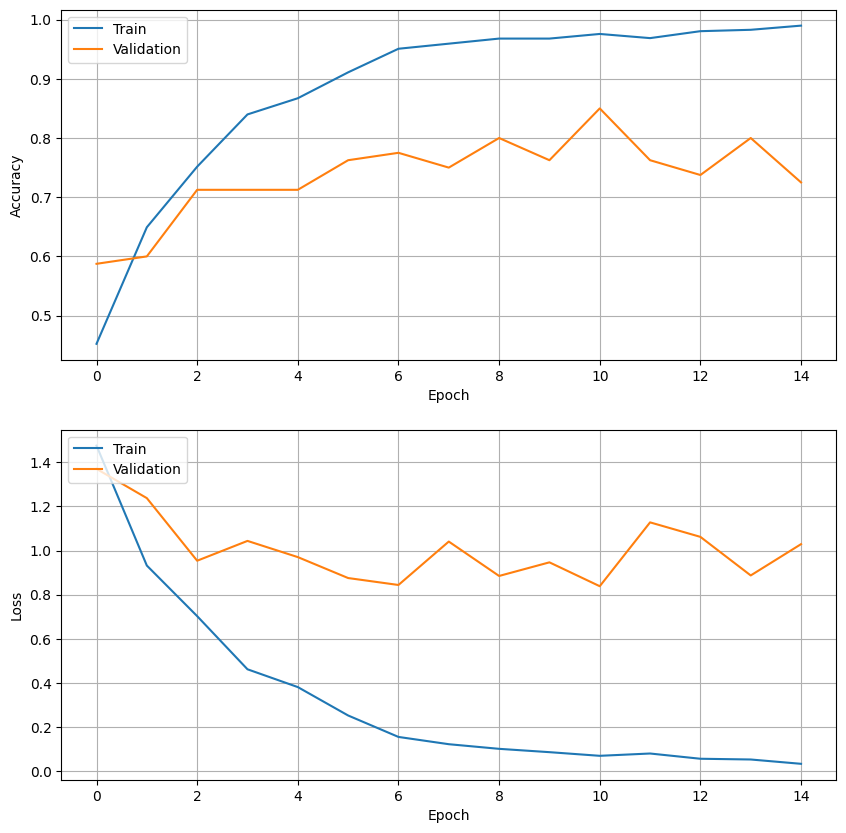

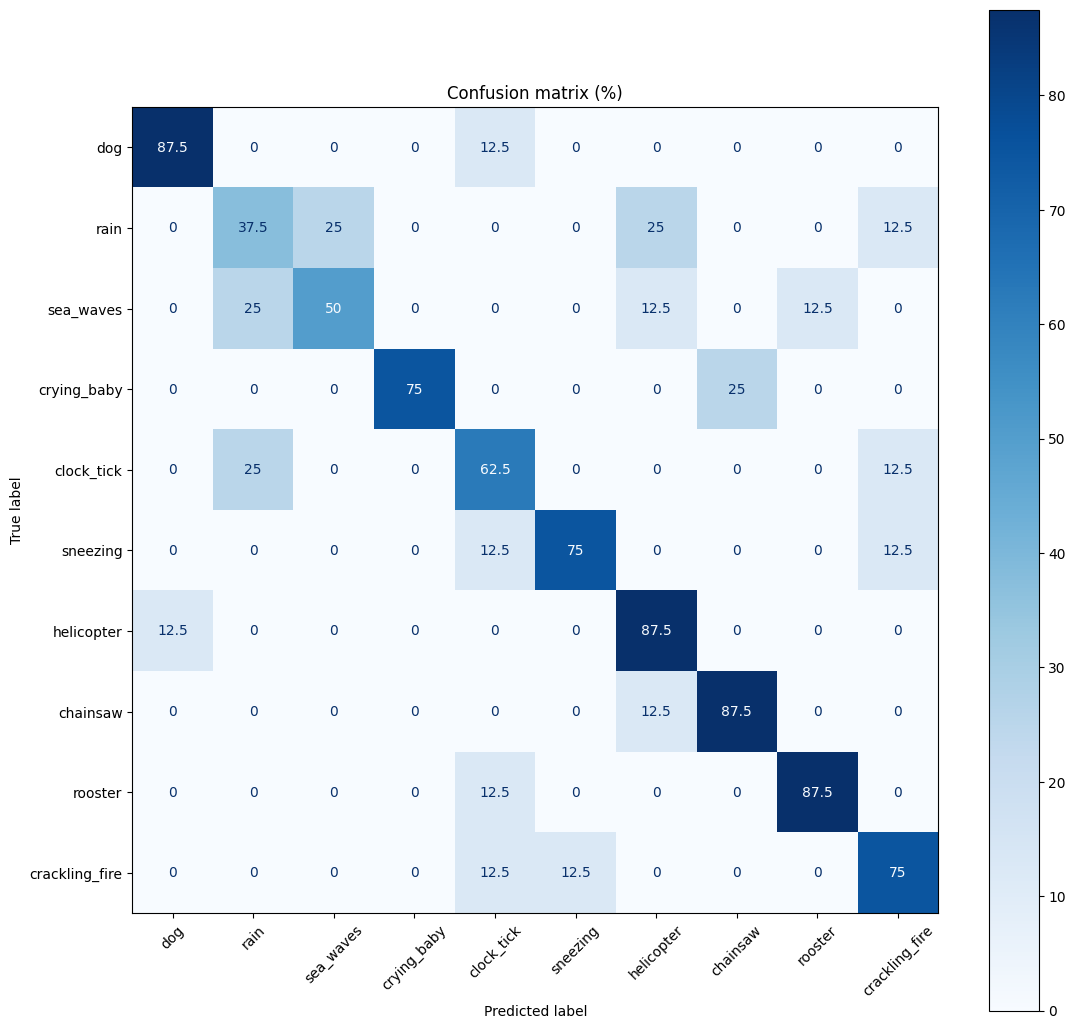

Fold 4/5

Pre-training accuracy: 10.000000149011612 %
Epoch 1/15
40/40 [==============================] - 36s 834ms/step - loss: 1.5007 - accuracy: 0.4523 - val_loss: 1.0348 - val_accuracy: 0.6125
Epoch 2/15
40/40 [==============================] - 33s 828ms/step - loss: 0.9101 - accuracy: 0.6797 - val_loss: 0.9397 - val_accuracy: 0.6375
Epoch 3/15
40/40 [==============================] - 33s 826ms/step - loss: 0.6126 - accuracy: 0.7852 - val_loss: 0.7609 - val_accuracy: 0.7250
Epoch 4/15
40/40 [==============================] - 34s 852ms/step - loss: 0.4209 - accuracy: 0.8594 - val_loss: 0.7164 - val_accuracy: 0.7500
Epoch 5/15
40/40 [==============================] - 33s 827ms/step - loss: 0.3337 - accuracy: 0.8781 - val_loss: 0.5718 - val_accuracy: 0.8500
Epoch 6/15
40/40 [==============================] - 32s 803ms/step - loss: 0.2820 - accuracy: 0.9094 - val_loss: 0.7588 - val_accuracy: 0.7250
Epoch 7/15
40/40 [==============================] - 32s 812ms/step - loss: 0.2562 - accu

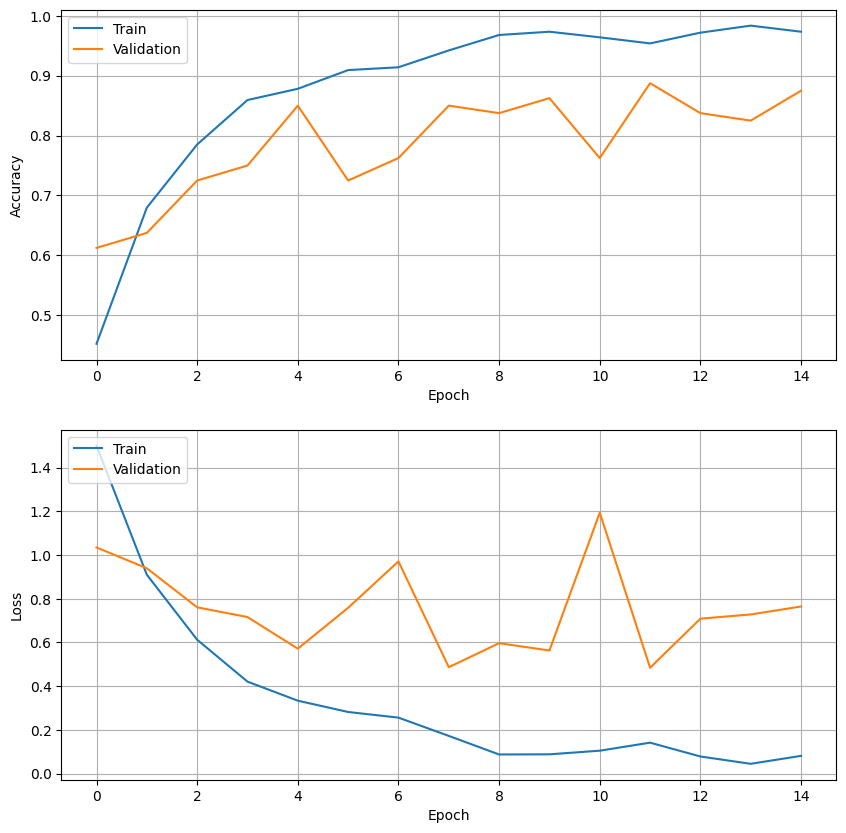

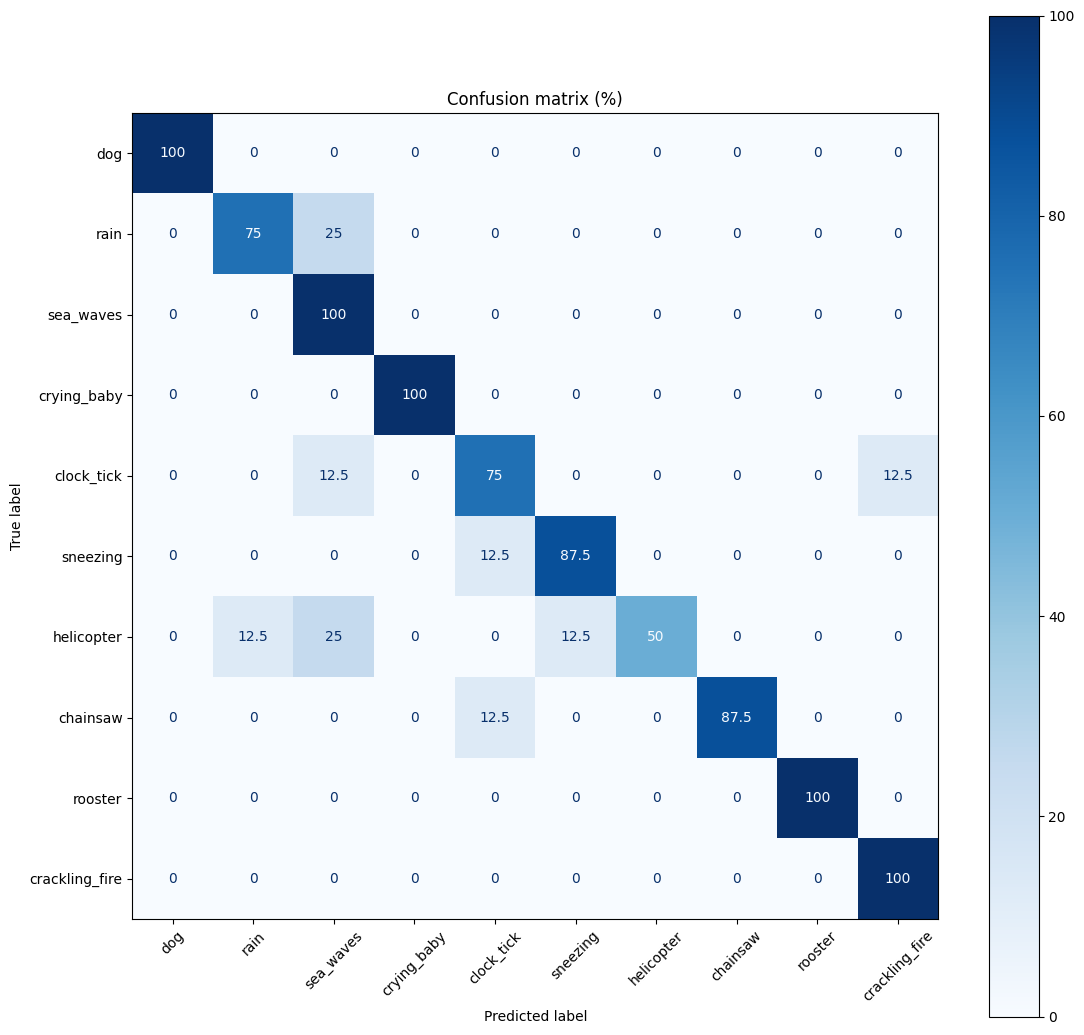

Fold 5/5

Pre-training accuracy: 10.000000149011612 %
Epoch 1/15
40/40 [==============================] - 42s 979ms/step - loss: 1.4940 - accuracy: 0.4703 - val_loss: 1.0877 - val_accuracy: 0.6500
Epoch 2/15
40/40 [==============================] - 36s 885ms/step - loss: 0.8419 - accuracy: 0.6891 - val_loss: 0.9871 - val_accuracy: 0.7500
Epoch 3/15
40/40 [==============================] - 35s 875ms/step - loss: 0.5784 - accuracy: 0.7922 - val_loss: 0.8259 - val_accuracy: 0.7500
Epoch 4/15
40/40 [==============================] - 37s 933ms/step - loss: 0.4781 - accuracy: 0.8438 - val_loss: 0.8900 - val_accuracy: 0.7625
Epoch 5/15
40/40 [==============================] - 32s 813ms/step - loss: 0.2824 - accuracy: 0.9094 - val_loss: 0.8794 - val_accuracy: 0.7750
Epoch 6/15
40/40 [==============================] - 32s 796ms/step - loss: 0.2085 - accuracy: 0.9289 - val_loss: 0.8224 - val_accuracy: 0.8000
Epoch 7/15
40/40 [==============================] - 32s 813ms/step - loss: 0.1990 - accu

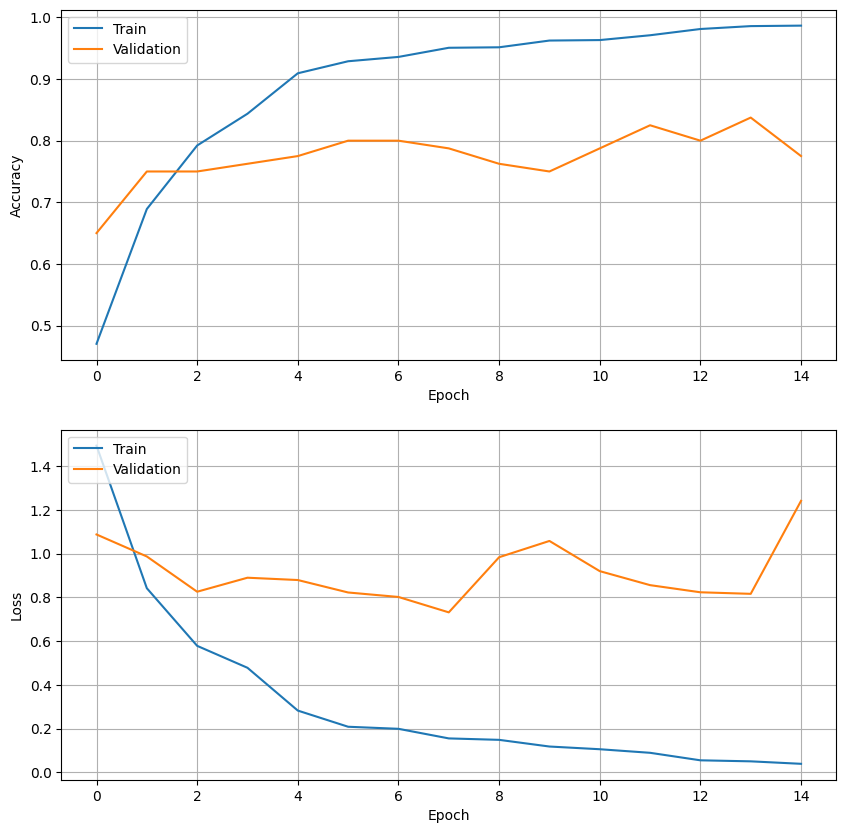

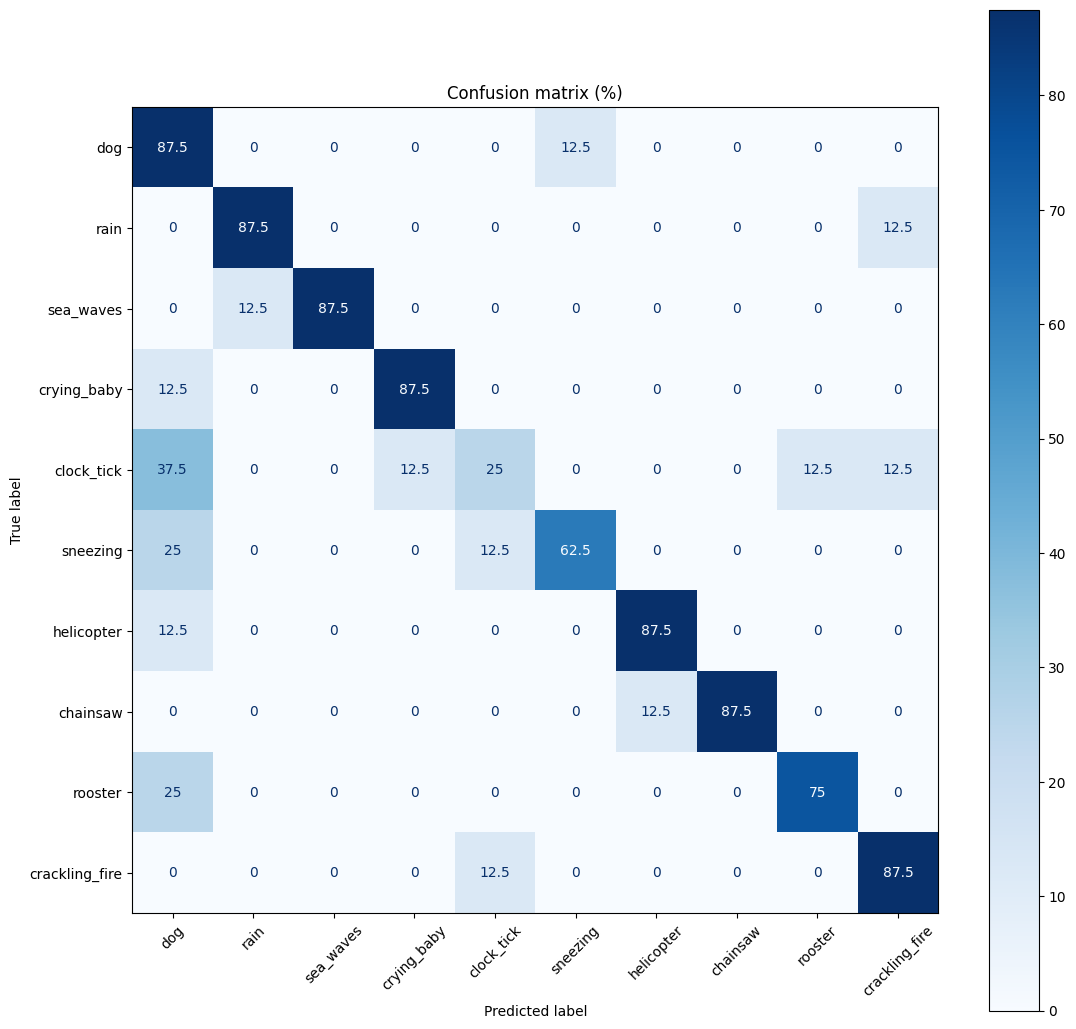

Average results:

Classification training results:
Average training accuracy: 0.98 ± 0.01
Average validation accuracy: 0.80 ± 0.05
Average training loss: 0.06 ± 0.03
Average validation loss: 1.01 ± 0.32

Average (total) training time: 500.58 ± 7.45 s

Plotting average results:

Classification training result plots:


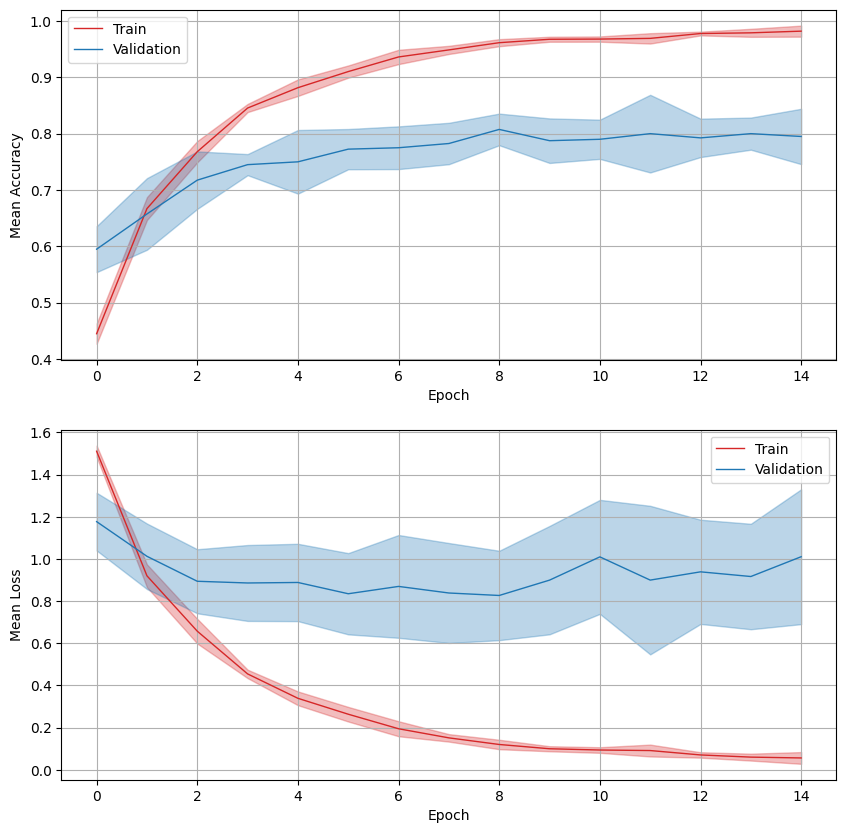

Average confusion matrix:



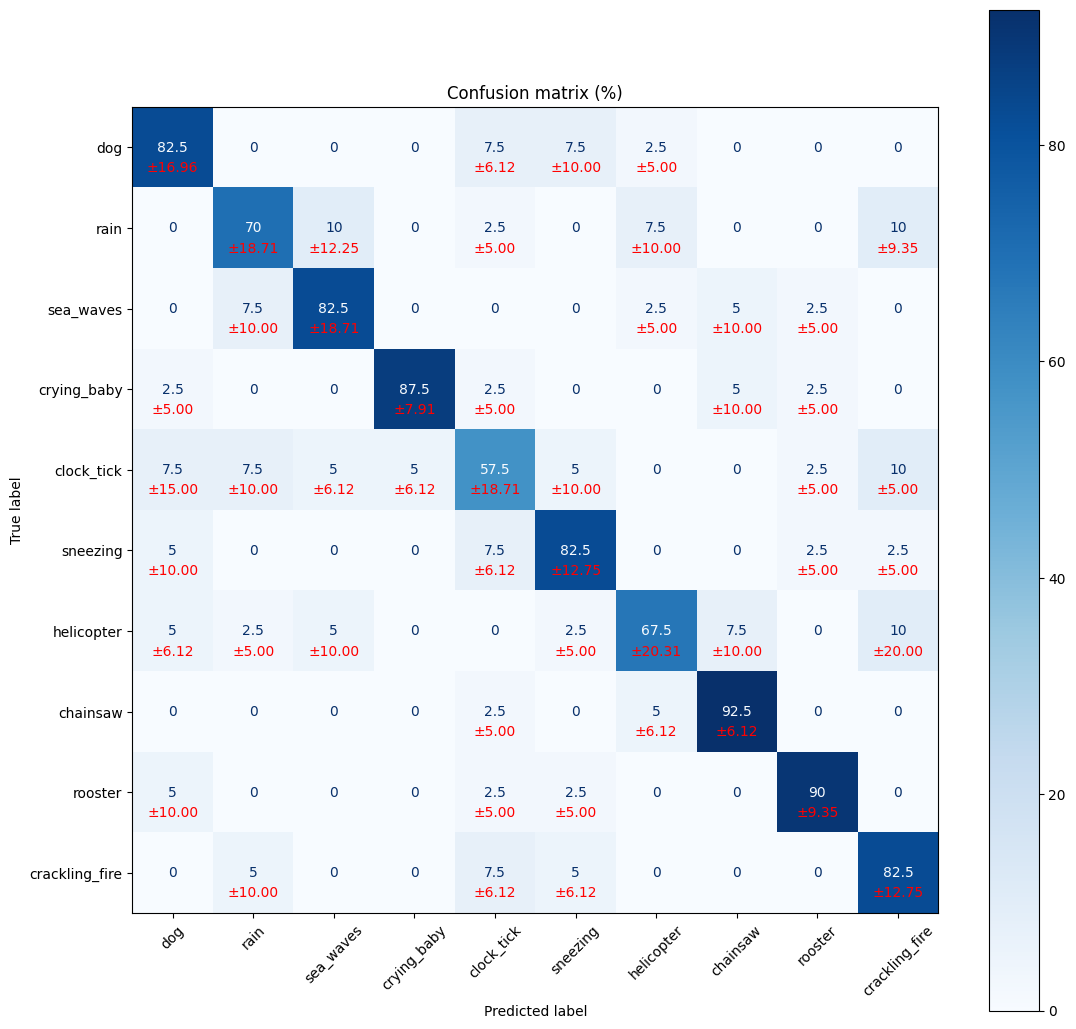

In [12]:
x_dim = (mel_shape[0], mel_shape[1])
history = cross_validation(df, init_model, X_dim=x_dim, n_folds=5, epochs=15, num_batch_size=32, verbose=1)